In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
train_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
test_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

# **EDA** 

In [47]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [48]:
test_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [49]:
column_name=['tweetID','entity','sentiment','tweet_content']
train_df.columns=column_name
test_df.columns=column_name
# combining data for analysis
df=pd.concat([train_df,test_df],ignore_index=False)
df.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  object
 3   tweet_content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [51]:
df.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [52]:
df.duplicated().sum()

3216

In [53]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("null values:","\n",df.isnull().sum())
print("duplicated values:",df.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


In [54]:
df2 = df.copy()
df2.drop(columns=['tweetID','tweet_content'],inplace=True,axis=1)

In [55]:
df2.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


[Text(0, 0, '19845'),
 Text(0, 0, '17879'),
 Text(0, 0, '21790'),
 Text(0, 0, '12624')]

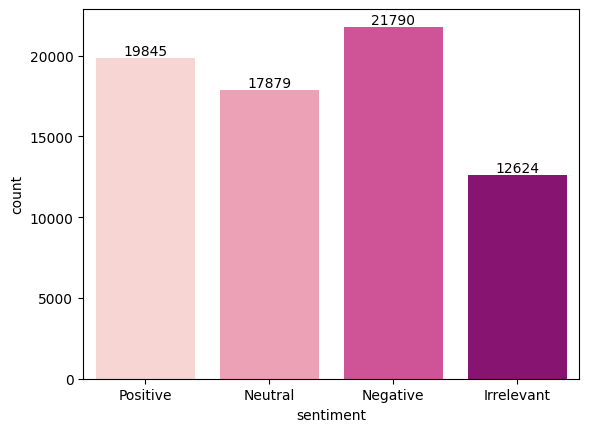

In [56]:
ax = sns.countplot(x=df2['sentiment'], palette='RdPu')
ax.bar_label(ax.containers[0])

<Axes: xlabel='entity'>

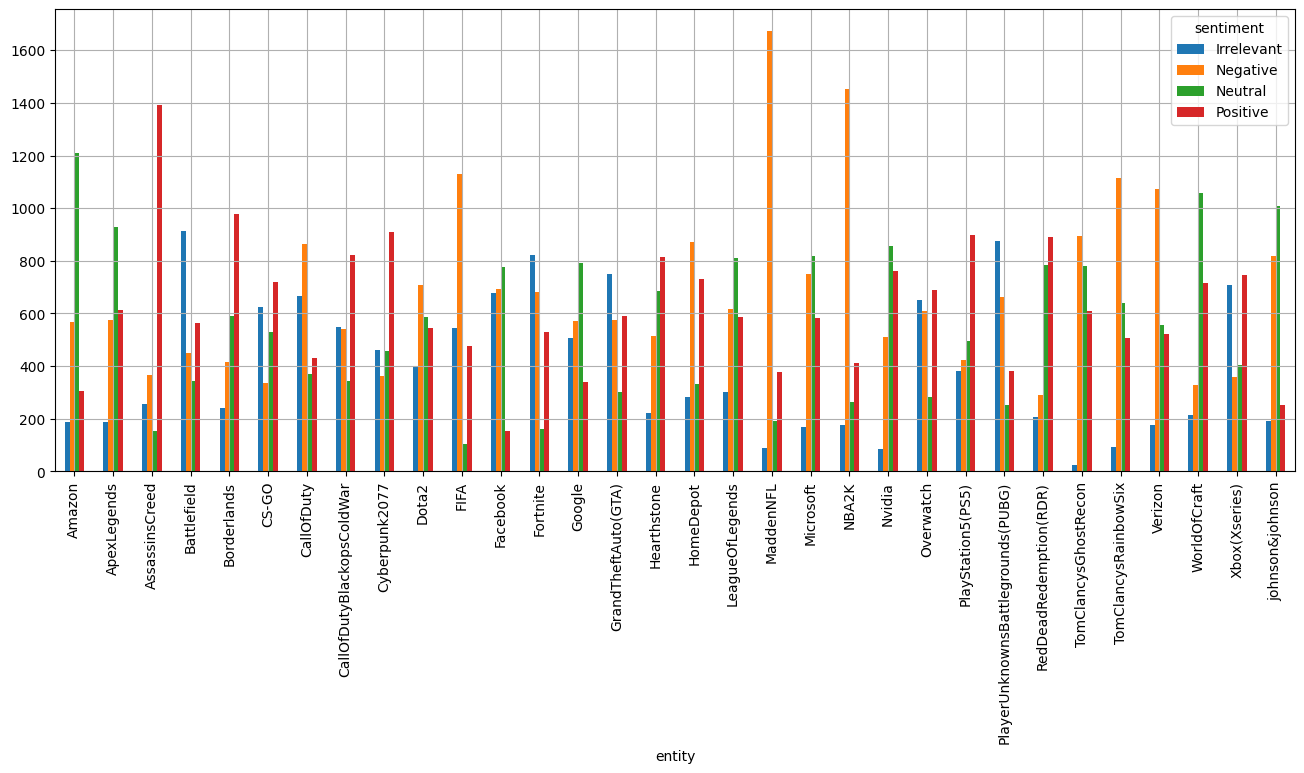

In [57]:
reactions_entities = pd.crosstab(df2['entity'],df2['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

From the above figure 
* The highest negative reactions in the MaddenNFL entity
* The highest irrelevant reactions in the Battlefield entity
* The highest neutral reactions in the Amazon entity
* The highest positive reactions in the AssassinsCreed entity

In [59]:
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding f
import re #Regular expressions
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [60]:
#Text transformation
train_df["lower"]=train_df.tweet_content.str.lower() #lowercase
train_df["lower"]=[str(data) for data in train_df.lower] #converting all to string
train_df["lower"]=train_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
test_df["lower"]=test_df.tweet_content.str.lower() #lowercase
test_df["lower"]=[str(data) for data in test_df.lower] #converting all to string
test_df["lower"]=test_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [61]:
train_df.head()

,tweetID,entity,sentiment,tweet_content,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


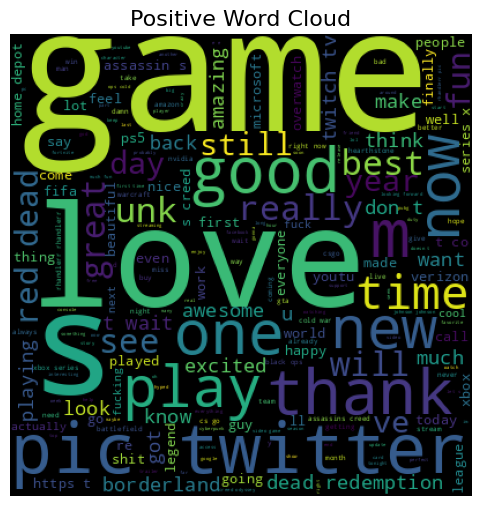

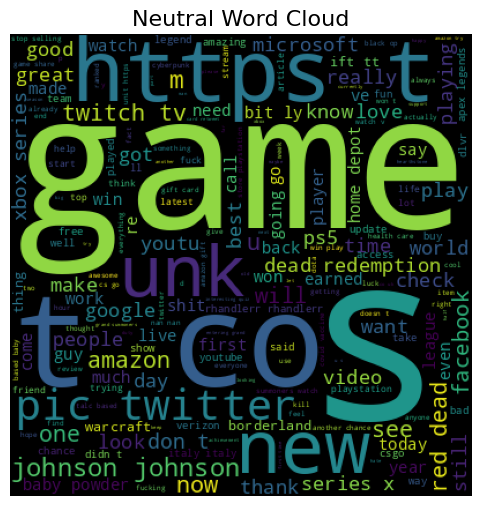

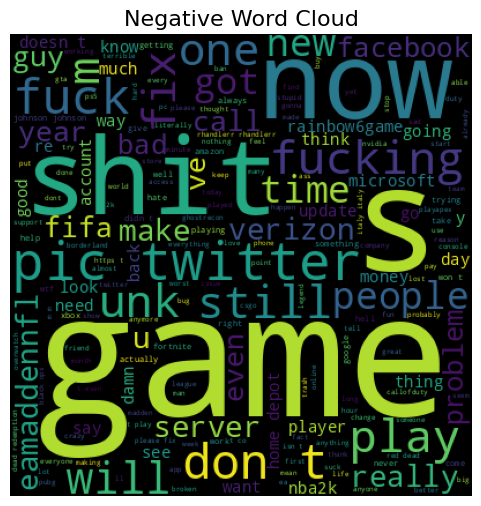

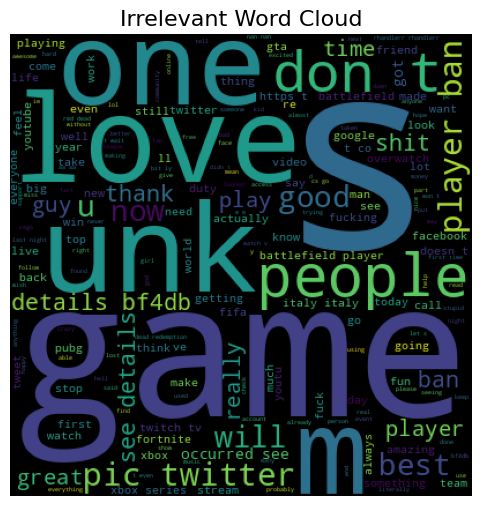

In [44]:
# Words Cloud for each emotion
def words_cloud(wordcloud, sentiment):
    plt.figure(figsize=(6, 6))
    plt.title(sentiment + ' Word Cloud', size=16)
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

sentiment_list = train_df['sentiment'].unique()
for sentiment in sentiment_list:
    text = ' '.join([sentence for sentence in train_df.loc[train_df['sentiment'] == sentiment, 'lower']])
    wordcloud = WordCloud(width=400, height=400).generate(text)
    words_cloud(wordcloud, sentiment)

In [62]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [63]:
reviews_train, reviews_test = train_test_split(train_df, test_size=0.2, random_state=0)

In [64]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [65]:
y_train_bow = reviews_train['sentiment']
y_test_bow = reviews_test['sentiment']
model = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
model.fit(X_train_bow, y_train_bow)

LogisticRegression(C=0.9, max_iter=1500, solver='liblinear')

In [66]:
train_pred = model.predict(X_train_bow)
print("Accuracy: ", accuracy_score(y_train_bow, train_pred) * 100)

Accuracy:  96.9553427959293


In [67]:
# Prediction
test_pred = model.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  90.975430139921
